In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



In [30]:
df = pd.read_csv('../data/result.csv')

df.columns

Index(['is_home_win', 'home_form_5', 'away_form_5', 'home_form_10',
       'away_form_10', 'home_form_15', 'away_form_15', 'days_off_home',
       'days_off_away', 'is_regular_season', 'is_playoffs',
       'match_number_season_home', 'match_number_season_away',
       'home_over_away_wins_diff_5', 'home_over_away_wins_diff_10',
       'home_win_probability_based_on_elo'],
      dtype='object')

In [31]:
df = df[['is_home_win', 'home_form_5', 'away_form_5', 'home_form_15', 'away_form_15', 'days_off_home', 'days_off_away', 'is_playoffs', 'home_over_away_wins_diff_10', 'home_win_probability_based_on_elo']]
df.describe()

,is_home_win,home_form_5,away_form_5,home_form_15,away_form_15,days_off_home,days_off_away,is_playoffs,home_over_away_wins_diff_10,home_win_probability_based_on_elo
count,13720.000000,13720.000000,13720.000000,13720.000000,13720.000000,13720.000000,13720.000000,13720.000000,13720.000000,13720.000000
mean,0.583382,1.426093,1.424636,4.278134,4.280029,2.517784,2.495700,0.072668,0.004592,0.499140
std,0.493016,1.027469,1.012930,1.871649,1.836770,1.465189,1.428617,0.259600,1.969457,0.086239
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-9.000000,0.217961
25%,0.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,0.000000,-1.000000,0.439287
50%,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.498743
75%,1.000000,2.000000,2.000000,6.000000,5.000000,3.000000,3.000000,0.000000,1.000000,0.558984
max,1.000000,5.000000,5.000000,12.000000,11.000000,16.000000,15.000000,1.000000,9.000000,0.812988


In [32]:
df['form_5_diff'] = df['home_form_5'] - df['away_form_5']
df['form_15_diff'] = df['home_form_15'] - df['away_form_15']
df['days_off_diff'] = df['days_off_home'] - df['days_off_away']
df = df[df['is_playoffs'] == 0].reset_index(drop=True)

df.drop(columns=['home_form_5', 'away_form_5', 'home_form_15', 'away_form_15', 'days_off_home', 'days_off_away', 'is_playoffs'], inplace=True)
df.describe()

,is_home_win,home_over_away_wins_diff_10,home_win_probability_based_on_elo,form_5_diff,form_15_diff,days_off_diff
count,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000
mean,0.580838,0.001651,0.499085,-0.006445,-0.005659,0.024130
std,0.493441,1.957033,0.086379,1.450419,2.511905,1.785626
min,0.000000,-9.000000,0.217961,-5.000000,-10.000000,-13.000000
25%,0.000000,-1.000000,0.439772,-1.000000,-2.000000,-1.000000
50%,1.000000,0.000000,0.498811,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.558372,1.000000,2.000000,1.000000
max,1.000000,9.000000,0.812988,5.000000,9.000000,10.000000


In [33]:
print(df.columns)
display(df.describe())

Index(['is_home_win', 'home_over_away_wins_diff_10',
       'home_win_probability_based_on_elo', 'form_5_diff', 'form_15_diff',
       'days_off_diff'],
      dtype='object')


,is_home_win,home_over_away_wins_diff_10,home_win_probability_based_on_elo,form_5_diff,form_15_diff,days_off_diff
count,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000,12723.000000
mean,0.580838,0.001651,0.499085,-0.006445,-0.005659,0.024130
std,0.493441,1.957033,0.086379,1.450419,2.511905,1.785626
min,0.000000,-9.000000,0.217961,-5.000000,-10.000000,-13.000000
25%,0.000000,-1.000000,0.439772,-1.000000,-2.000000,-1.000000
50%,1.000000,0.000000,0.498811,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.558372,1.000000,2.000000,1.000000
max,1.000000,9.000000,0.812988,5.000000,9.000000,10.000000


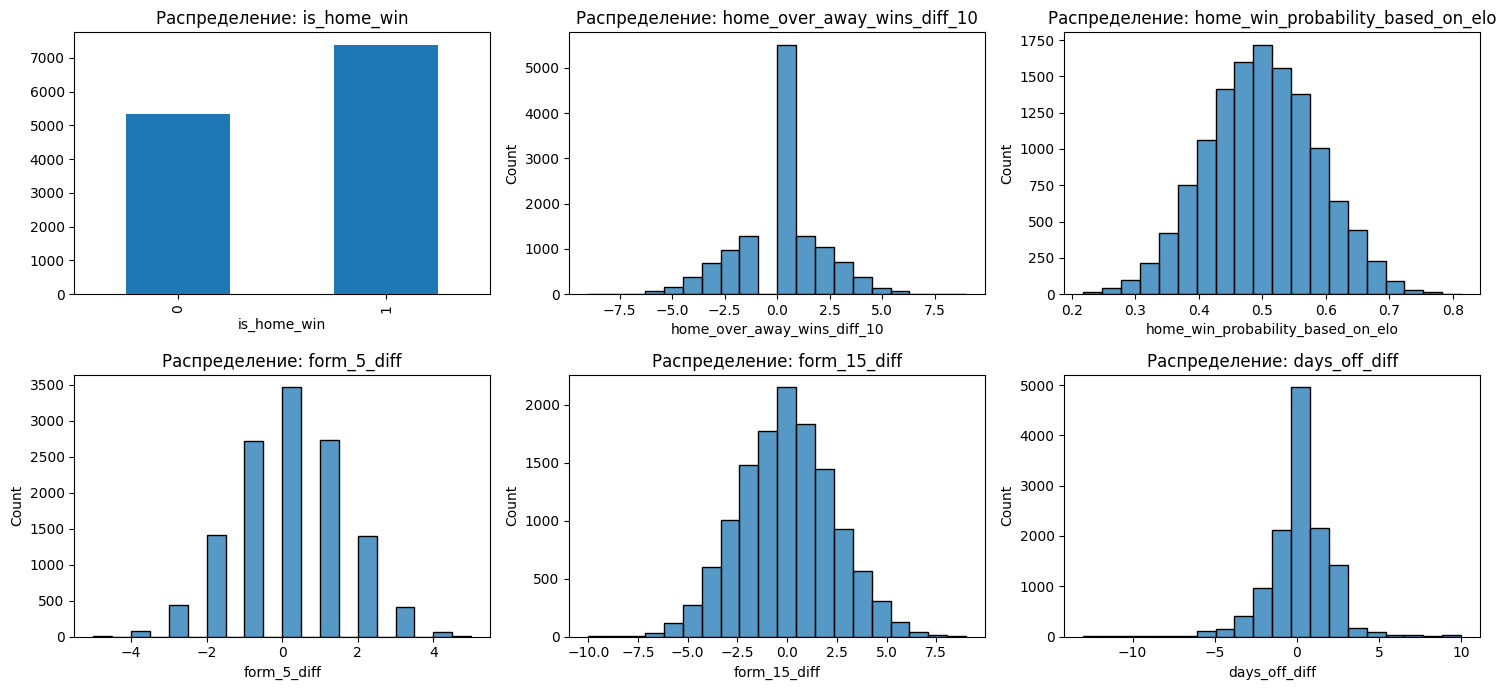

In [34]:
columns_to_plot = [
    'is_home_win', 'home_over_away_wins_diff_10',
       'home_win_probability_based_on_elo', 'form_5_diff', 'form_15_diff',
       'days_off_diff'
]


n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 7))

for idx, column in enumerate(columns_to_plot):
    ax = axes[idx // n_cols, idx % n_cols]

    if df[column].nunique() <= 5 and df[column].dtype != float:
        df[column].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_xlabel(column)
    else:
        sns.histplot(df[column], bins=20, kde=False, ax=ax)
        ax.set_xlabel(column)
    ax.set_title(f'Распределение: {column}')

plt.tight_layout()
plt.show()

In [35]:
y = df['is_home_win']
X = df.drop(columns=['is_home_win'])

ss = StandardScaler()
X = ss.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9542, 5) (3181, 5) (9542,) (3181,)


In [37]:
print(y_train.value_counts())
print(y_test.value_counts())

is_home_win
1    5576
0    3966
Name: count, dtype: int64
is_home_win
1    1814
0    1367
Name: count, dtype: int64


In [56]:
# Логистическая регрессия в лоб

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"roc auc score {roc_auc_score(y_test, y_pred)}")
print(f"f1 score {f1_score(y_test, y_pred)}")

# Получим веса (коэффициенты) модели после обучения
print("Коэффициенты (weights) модели:")
print(lr.coef_[0])

accuracy score: 0.5702609242376611
roc auc score 0.5
f1 score 0.7263263263263263
Коэффициенты (weights) модели:
[-0.0137611  -0.01959564  0.03093072  0.02898611  0.01468225]


In [62]:
# Попробуем сделать классификацию с помощью логистической регрессии, сразу найдем лучший гиперпараметр С (используя метрику roc_auc)

params = {'C' : [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc')
gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_)

# Найдем значение accuracy, полученное от такого С

lr = LogisticRegression(C=gs.best_params_['C'])
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"accuracy score {accuracy_score(y_test, y_pred)}")
# Получим веса (коэффициенты) модели после обучения
print("Коэффициенты (weights) модели:")
print(lr.coef_[0])


0.4938134876573961
{'C': 140}
accuracy score 0.5702609242376611
Коэффициенты (weights) модели:
[-0.01376675 -0.01961286  0.03094237  0.02899926  0.01468877]


In [63]:
# Теперь то же самое для f1

params = {'C' : [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='f1')
gs.fit(X, y)

print(gs.best_score_)
print(gs.best_params_)

# Найдем значение accuracy, полученное от такого С

lr = LogisticRegression(C=gs.best_params_['C'])
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"accuracy score {accuracy_score(y_test, y_pred)}")

# Получим веса (коэффициенты) модели после обучения
print("Коэффициенты (weights) модели:")
print(lr.coef_[0])

0.7348481019341649
{'C': 1e-15}
accuracy score 0.5702609242376611
Коэффициенты (weights) модели:
[-2.94530611e-14  3.30656041e-15  9.68810229e-14  8.72015883e-14
  3.19045671e-14]


In [65]:
# Теперь попробуем SVM

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(f"accuracy score {accuracy_score(y_test, y_pred)}")
print(f"roc auc score {roc_auc_score(y_test, y_pred)}")
print(f"f1 score {f1_score(y_test, y_pred)}")

accuracy score 0.5696321911348633
roc auc score 0.5000796455109371
f1 score 0.725045189797148


In [67]:
# Теперь попробуем SVM с разными ядрами

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    print(f'Ядро: {kernel}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
    print(f'F1: {f1_score(y_test, y_pred)}')
    if kernel == 'linear':
        # Получим веса (коэффициенты) модели после обучения
        print("Коэффициенты (weights) модели:")
        print(svm.coef_[0])       
    print('-' * 50)  

Ядро: linear
Accuracy: 0.5702609242376611
ROC AUC: 0.5
F1: 0.7263263263263263
Коэффициенты (weights) модели:
[ 4.88876729e-06 -4.35704741e-07  9.80631008e-06  3.86125018e-06
  7.04122652e-06]
--------------------------------------------------
Ядро: rbf
Accuracy: 0.5696321911348633
ROC AUC: 0.5000796455109371
F1: 0.725045189797148
--------------------------------------------------
Ядро: poly
Accuracy: 0.5702609242376611
ROC AUC: 0.5
F1: 0.7263263263263263
--------------------------------------------------
Ядро: sigmoid
Accuracy: 0.4919836529393273
ROC AUC: 0.47949682587434644
F1: 0.5606307775965198
--------------------------------------------------


In [81]:
# попробуем алгоритмически высчитывать победу на основе эло

df['home_win_by_elo'] = (df['home_win_probability_based_on_elo'] >= 0.5)
sum = (df['home_win_by_elo'] == df['is_home_win']).sum()
print(f"Accuracy: {sum / df.shape[0]}")

Accuracy: 0.5025544289868742
